In [180]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
sns.set(color_codes=True)

%matplotlib inline

In [187]:
with open("df_pre.pkl", 'rb') as picklefile: 
    df_pre = pickle.load(picklefile)
    

In [188]:
df_pre

,calories,carbohydrates,protein,rating,serving,url,cholesterol,sodium,reviews_count,make_it_again,...,Coffee,Port,Mussel,Orange Juice,Cod,Okra,Fig,Quinoa,Trout,success_score
"""Nextover"" Chicken Tacos with Quick Refried Beans",1224,65,65,3.0,2,https://www.epicurious.com/recipes/food/views/...,292,1632,3,0.67,...,0,0,0,0,0,0,0,0,0,2.010
10-Minute Chicken Flatbreads with Hummus and Yogurt,463,42,35,3.5,4,https://www.epicurious.com/recipes/food/views/...,115,917,6,0.83,...,0,0,0,0,0,0,0,0,0,2.905
10-Minute Sausage Skillet with Cherry Tomatoes and Broccolini,476,20,22,4.0,4,https://www.epicurious.com/recipes/food/views/...,70,1046,11,1.00,...,0,0,0,0,0,0,0,0,0,4.000
10-Minute Shrimp with Green Beans and Creamy Lemon-Dill Dip,482,18,30,2.5,4,https://www.epicurious.com/recipes/food/views/...,230,1189,3,1.00,...,0,0,0,0,0,0,0,0,0,2.500
3-Ingredient Cacio e Pepe (Pasta With Cheese and Pepper),736,89,35,2.0,4,https://www.epicurious.com/recipes/food/views/...,66,922,5,0.60,...,0,0,0,0,0,0,0,0,0,1.200
3-Ingredient Creamy Pumpkin Pasta,694,91,17,3.0,4,https://www.epicurious.com/recipes/food/views/...,102,508,1,1.00,...,0,0,0,0,0,0,0,0,0,3.000
"3-Ingredient Grilled Steak, Pineapple, and Avocado Salad",902,39,47,4.0,4,https://www.epicurious.com/recipes/food/views/...,186,838,3,1.00,...,0,0,0,0,0,0,0,0,0,4.000
3-Ingredient Ice Cream French Toast,757,69,13,4.0,2,https://www.epicurious.com/recipes/food/views/...,175,414,1,1.00,...,0,0,0,0,0,0,0,0,0,4.000
3-Ingredient Orecchiette with Sausage and Fennel,500,72,26,4.0,4,https://www.epicurious.com/recipes/food/views/...,26,603,6,1.00,...,0,0,0,0,0,0,0,0,0,4.000
3-Ingredient Sausage Dinner With Lentils and Fennel,510,41,27,4.0,4,https://www.epicurious.com/recipes/food/views/...,25,627,1,1.00,...,0,0,0,0,0,0,0,0,0,4.000


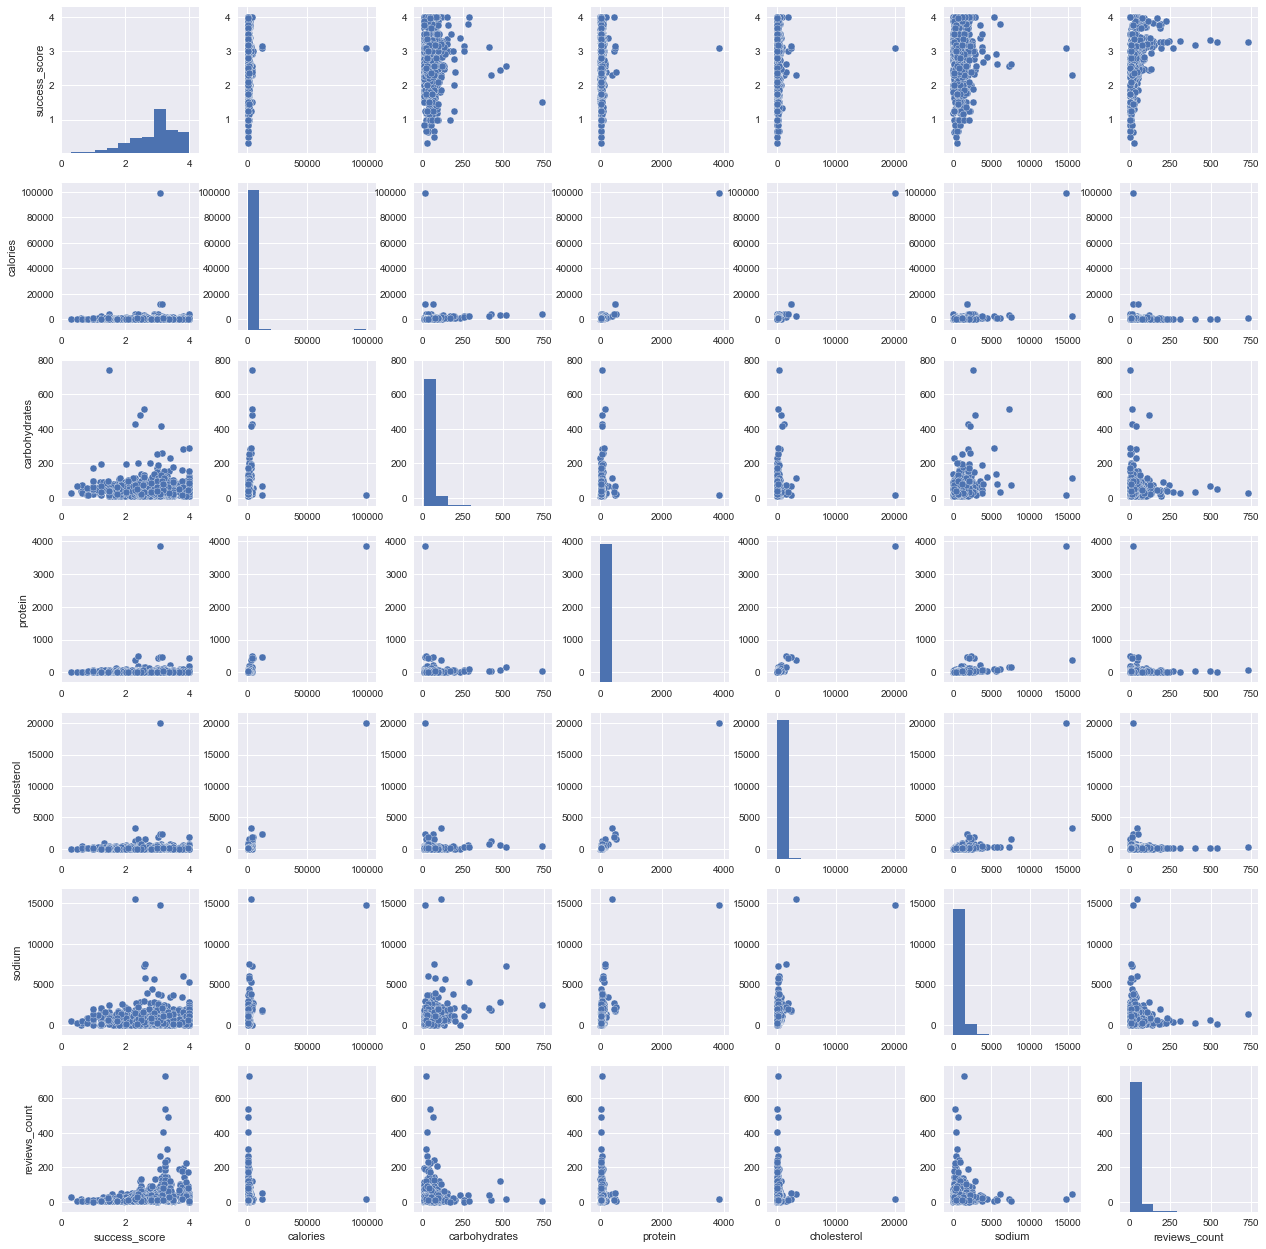

In [189]:
sns.pairplot(df_pre[['success_score','url','calories', 'carbohydrates', 'protein', 'cholesterol','sodium', 'reviews_count']])

## Features Selection

In [190]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE
X = df_pre.drop(['rating','url','date','make_it_again','success_score'], axis =1)
y = df_pre['rating']

model = LinearRegression()
# create the RFE model and select 90 features
rfe = RFE(model, 90)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
selected_features_ranking = list(zip(X.columns,rfe.support_,rfe.ranking_))


In [191]:
#create a new dataframe with only features selected by RFE
selected_features = [i[0] for i in selected_features_ranking if i[1] == True]
selected_features_df = pd.DataFrame()
for i in selected_features:
    selected_features_df[i] = df_pre[i]
    

In [192]:
df = pd.merge(df_pre[['success_score','rating','url','calories', 'carbohydrates', 'protein', 'cholesterol','sodium', 'reviews_count','cooking_time']].reset_index(), selected_features_df.reset_index(), on = 'index', how='inner').set_index('index')
df

,success_score,rating,url,calories,carbohydrates,protein,cholesterol,sodium,reviews_count,cooking_time,...,Lime,Ground Lamb,Nutmeg,Pear,Beer,Sesame,Mussel,Okra,Fig,Trout
index,,,,,,,,,,,,,,,,,,,,,
"""Nextover"" Chicken Tacos with Quick Refried Beans",2.010,3.0,https://www.epicurious.com/recipes/food/views/...,1224,65,65,292,1632,3,20,...,0,0,0,0,0,0,0,0,0,0
10-Minute Chicken Flatbreads with Hummus and Yogurt,2.905,3.5,https://www.epicurious.com/recipes/food/views/...,463,42,35,115,917,6,10,...,0,0,0,0,0,0,0,0,0,0
10-Minute Sausage Skillet with Cherry Tomatoes and Broccolini,4.000,4.0,https://www.epicurious.com/recipes/food/views/...,476,20,22,70,1046,11,10,...,0,0,0,0,0,0,0,0,0,0
10-Minute Shrimp with Green Beans and Creamy Lemon-Dill Dip,2.500,2.5,https://www.epicurious.com/recipes/food/views/...,482,18,30,230,1189,3,10,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Cacio e Pepe (Pasta With Cheese and Pepper),1.200,2.0,https://www.epicurious.com/recipes/food/views/...,736,89,35,66,922,5,30,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Creamy Pumpkin Pasta,3.000,3.0,https://www.epicurious.com/recipes/food/views/...,694,91,17,102,508,1,25,...,0,0,0,0,0,0,0,0,0,0
"3-Ingredient Grilled Steak, Pineapple, and Avocado Salad",4.000,4.0,https://www.epicurious.com/recipes/food/views/...,902,39,47,186,838,3,35,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Ice Cream French Toast,4.000,4.0,https://www.epicurious.com/recipes/food/views/...,757,69,13,175,414,1,20,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Orecchiette with Sausage and Fennel,4.000,4.0,https://www.epicurious.com/recipes/food/views/...,500,72,26,26,603,6,25,...,0,0,0,0,0,0,0,0,0,0


In [193]:
df.describe()


,success_score,rating,calories,carbohydrates,protein,cholesterol,sodium,reviews_count,cooking_time,Egg,...,Lime,Ground Lamb,Nutmeg,Pear,Beer,Sesame,Mussel,Okra,Fig,Trout
count,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,...,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000
mean,2.945583,3.376689,730.947635,46.418074,33.695101,151.823480,809.772804,27.112331,66.710304,0.099662,...,0.005068,0.005068,0.004223,0.004223,0.004223,0.004223,0.004223,0.004223,0.003378,0.003378
std,0.708222,0.431237,2927.493410,44.827801,117.121459,614.256083,933.787205,44.127841,62.283781,0.299676,...,0.071036,0.071036,0.064874,0.064874,0.064874,0.064874,0.064874,0.064874,0.058050,0.058050
min,0.315000,1.000000,73.000000,11.000000,2.000000,0.000000,2.000000,1.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.520000,3.000000,331.000000,23.000000,10.750000,29.000000,299.750000,7.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.062500,3.500000,522.000000,36.000000,24.000000,93.500000,646.000000,15.000000,45.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.407500,3.500000,771.000000,58.000000,40.000000,183.000000,1069.500000,33.000000,60.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,4.000000,98668.000000,741.000000,3840.000000,20077.000000,15504.000000,731.000000,360.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### MVP

In [194]:
X = df['cooking_time']
y = df['calories']

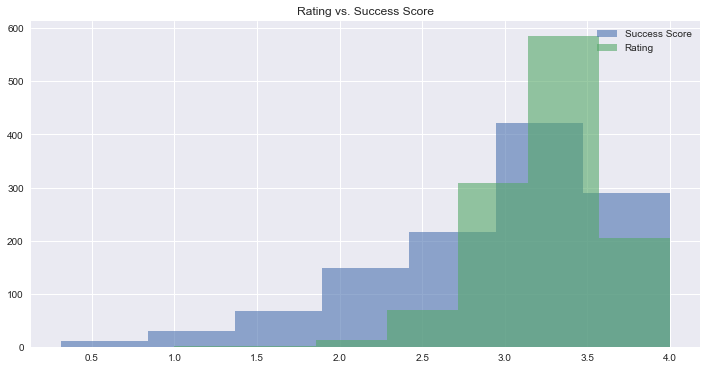

In [195]:
plt.figure(figsize=(12,6))
plt.hist(df['success_score'], bins = 7, alpha=0.6, label='Success Score')
plt.hist(df['rating'], bins = 7, alpha=0.6, label='Rating')
plt.legend(loc='upper right')
plt.title('Rating vs. Success Score')
plt.show()

In [196]:
#log transformation to address skewed data
df1 = df
df['ln_calories'] = np.log(df['calories'])
df['ln_cholesterol'] = np.log(df['cholesterol'])
df['ln_sodium'] = np.log(df['sodium'])

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


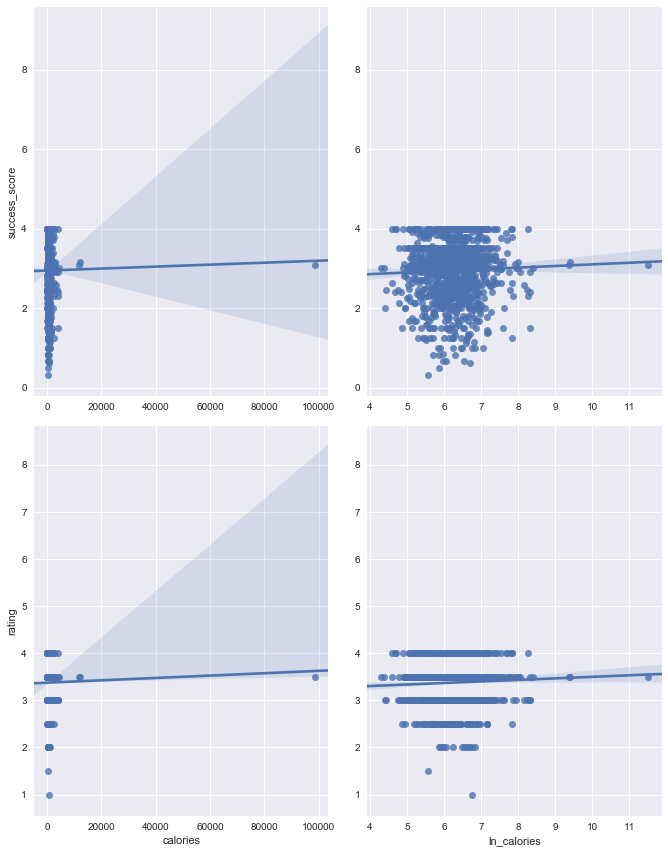

In [197]:
sns.pairplot(df1, x_vars=["calories", 'ln_calories'], y_vars=["success_score", "rating"],
             size=6, aspect=.8, kind="reg");

## Regression Model

### Linear Regression on Basic Features

In [198]:
X = df.drop(['rating','success_score','url','reviews_count'], axis =1)
y = df['success_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
## isolate the features for the training X
X_1 = X_train[['calories', 'carbohydrates', 'protein', 'cholesterol','sodium','cooking_time']]


In [202]:
## Add constant and use StatsModels to generate an OLS regression model
X_1 = sm.add_constant(X_1)
lm1 = sm.OLS(y_train, X_1)
lm1_fit = lm1.fit()
lm1_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          success_score   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.214
Date:                Wed, 31 Jan 2018   Prob (F-statistic):             0.0398
Time:                        11:09:37   Log-Likelihood:                -893.53
No. Observations:                 828   AIC:                             1801.
Df Residuals:                     821   BIC:                             1834.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.9228      0.047     62.828      0.000       2.832       3.014
calories       1.802e-05      5e-05      0.360      0.719   -8.02e-05       0.000
carbohydrates    -0.0011      0.001     -1.786      0.074      -0.002       0.000
protein           0.0026      0.001      1.714      0.087      -0.000       0.006
cholesterol      -0.0006      0.000     -2.715      0.007      -0.001      -0.000
sodium         6.947e-05   3.69e-05      1.884      0.060   -2.92e-06       0.000
cooking_time      0.0002      0.000      0.490      0.625      -0.001       0.001
==============================================================================
Omnibus:                       69.866   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.772
Skew:                          -0.754   Prob(JB):                     2.37e-19
Kurtosis:                       3.461   Cond. No.                     6.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linear Regression on categorical variables for Ingredients

In [200]:
## Exclude basic variables
X_2 = X_train.drop(['calories', 'carbohydrates', 'protein', 'cholesterol', 'sodium','cooking_time'], 1)


In [201]:
lm2 = sm.OLS(y_train, X_2)
lm2_fit = lm2.fit()
lm2_fit.summary()

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1574: RuntimeWarning: invalid value encountered in greater
  return (S > tol).sum(axis=-1)


LinAlgError: SVD did not converge

### Linear Regression on all features

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lm3 = sm.OLS(y_train, X_train)
lm3_fit = lm3.fit()
lm3_fit.summary()

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1574: RuntimeWarning: invalid value encountered in greater
  return (S > tol).sum(axis=-1)


LinAlgError: SVD did not converge

R^2 = 79%

"""Prob (F-statisic): If p-value < 0.05, we can reject the null hypothesis.
P >|t|: if p-value < 0.05, we can reject the null hypothesis: This variable does contribute to this model
Prob(Omnibus): The p-value for this test. If p-value < 0.05, we reject the null hypothesis, meaning that the residuals do not exactly follow the normal distribution that we assumed.
Jaque Beara: Normality Test
Prob(JB) Null hypothesis: ε is normally distributed.
Skewness and Kurtosis: Idea is we are looking for a skewness coeff. ~ 0, and Kurtosis ~ 3. JB tests if those conditions are held against alternatives.
Condition Number: Note that as the condition number becomes quite large, then this implies that the matrix is ill-posed (does not have a unique, well-defined solution). This may be due to multicollinear relationships between independent variables"""

### Predictions and Evaluations

In [204]:
from sklearn import metrics
predictions = lm3_fit.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

ValueError: shapes (356,99) and (96,) not aligned: 99 (dim 1) != 96 (dim 0)

### Homoscedascity analysis

ValueError: x and y must be the same size

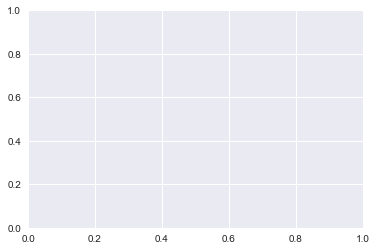

In [205]:
plt.scatter(predictions, y_test)
plt.title('Predictions vs. Actual Outcome')
plt.axis((-1,10,0,5))
plt.ylabel('Actual outcome')
plt.xlabel('Predicted outcome')

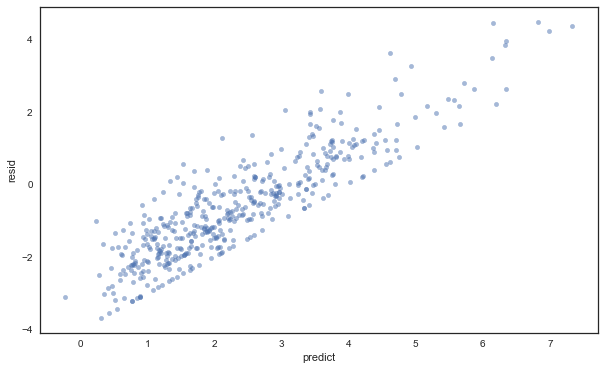

In [164]:
# Residual plot: plot residuals vs predicted
df['predict']=lm3_fit.predict(X_test)
df['resid']= df.predict - y_test
with sns.axes_style('white'):
    plot = df.plot(
        kind='scatter', x='predict', y='resid', alpha=0.5, figsize=(10,6))

Text(0,0.5,'y')

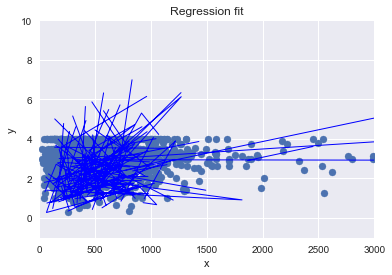

In [174]:
plt.scatter(df.calories,df.success_score)
plt.plot(df.calories, df.predict, color='blue',linewidth=1)
plt.title("Regression fit")
plt.axis((-1,3000,-1,10))
plt.xlabel("x")
plt.ylabel("y")

In [165]:
#residual plot versus predictions

#x_plot = plt.scatter(predictions, (predictions - y_test))
#plt.hlines(y=0, xmin= -1, xmax=50)
#plt.title('Residual plot')
#plt.axis((-1,10,-5,5))
#plt.ylabel('Residuals')
#plt.xlabel('Predictions')

How to diagnose: nonlinearity is usually most evident in a plot of observed versus predicted values or a plot of residuals versus predicted values, which are a part of standard regression output. The points should be symmetrically distributed around a diagonal line in the former plot or around horizontal line in the latter plot, with a roughly constant variance. 

Text(0,0.5,'Residuals')

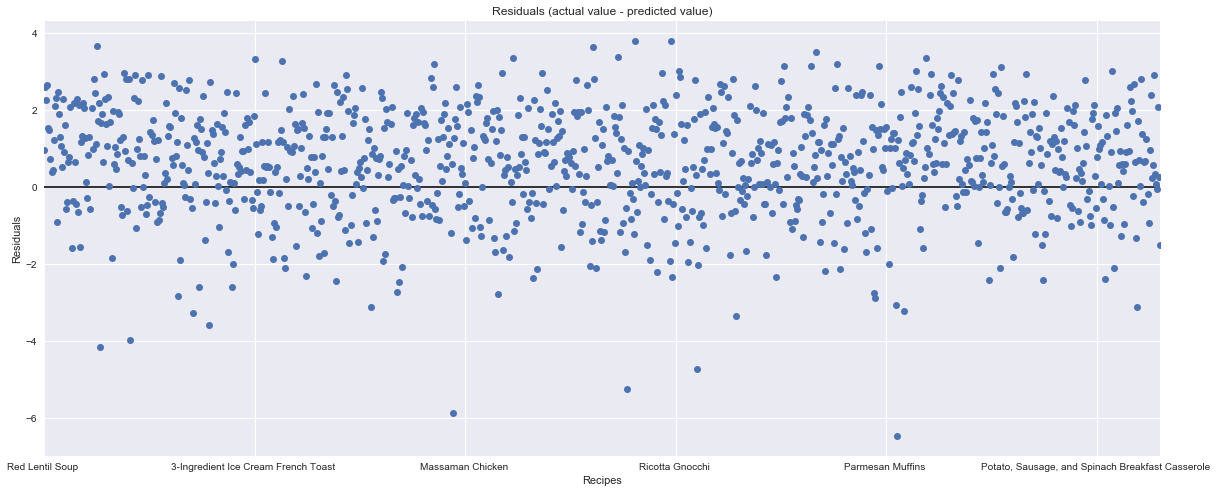

In [125]:
lm3_fit.resid.plot(style='o', figsize=(20,8))
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residuals (actual value - predicted value)')
plt.xlabel('Recipes')
plt.ylabel('Residuals')

#### Residual Histogram

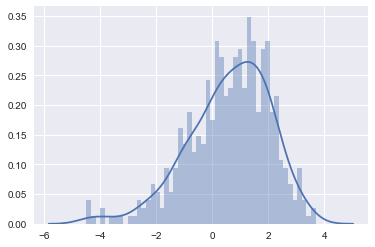

In [134]:
#residuals normal distributed
sns.distplot((y_test-predictions),bins=50);


## Cross-validation

In [126]:
#X = df.drop(['rating','success_score','url'], axis =1)
#y = df['success_score']

In [127]:
lm = linear_model.LinearRegression()
scores = cross_val_score(lm, X_train, y_train, cv = 5)
print (scores, scores.mean())

[-0.13295079  0.03093672 -0.13008341 -0.12520962 -0.05956391] -0.083374202372


/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


encv: alpha = 1e-07 mean squared error = 0.470842880558
encv: alpha = 1e-06 mean squared error = 0.470832347399


/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


encv: alpha = 1e-05 mean squared error = 0.470727871951
encv: alpha = 0.0001 mean squared error = 0.469724057349
encv: alpha = 0.001 mean squared error = 0.465414859738
encv: alpha = 0.01 mean squared error = 0.496537238043
encv: alpha = 1 mean squared error = 0.501584652548
rcv: alpha = 1e-07 mean squared error = 0.470844051003
rcv: alpha = 1e-06 mean squared error = 0.470844043233
rcv: alpha = 1e-05 mean squared error = 0.470843965537
rcv: alpha = 0.0001 mean squared error = 0.47084318862
rcv: alpha = 0.001 mean squared error = 0.470835424234
rcv: alpha = 0.01 mean squared error = 0.470758256133
rcv: alpha = 1 mean squared error = 0.465760748215
lmse: alpha = 1e-07 mean squared error = 0.470842625136


/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


lmse: alpha = 1e-06 mean squared error = 0.470829799888
lmse: alpha = 1e-05 mean squared error = 0.470702925213


/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


lmse: alpha = 0.0001 mean squared error = 0.469483505209
lmse: alpha = 0.001 mean squared error = 0.467382345515
lmse: alpha = 0.01 mean squared error = 0.501312552639
lmse: alpha = 1 mean squared error = 0.502098821547


/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "upper_left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


Text(0.5,1,'MSE vs log(Alpha)')

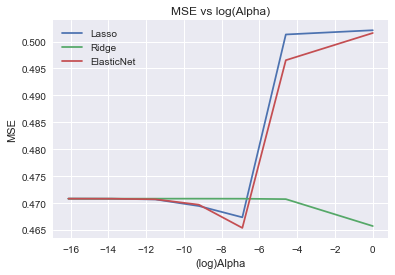

In [128]:

from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
encv = ElasticNetCV(cv = 10, alphas = [1e-5,1e-3,1,1e3,1e5])



alphas = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1]
enmse = []
for a in alphas:
    encv = ElasticNetCV(cv = 10, alphas =[a])
    encv.fit(X_train,y_train)
    enmse.append(mean_squared_error(y,encv.predict(X)))
    print('encv: alpha =',a, 'mean squared error =',mean_squared_error(y,encv.predict(X)))
    
rmse = []
for a in alphas:
    rcv = RidgeCV(cv = 10, alphas =[a])
    rcv.fit(X_train,y_train)
    rmse.append(mean_squared_error(y,rcv.predict(X)))
    print('rcv: alpha =',a, 'mean squared error =',mean_squared_error(y,rcv.predict(X)))
    
lmse = []
for a in alphas:
    lcv = LassoCV(cv = 10, alphas =[a])
    lcv.fit(X_train,y_train)
    lmse.append(mean_squared_error(y,lcv.predict(X)))
    print('lmse: alpha =',a, 'mean squared error =',mean_squared_error(y,lcv.predict(X)))
    
plt.figure(figsize=(20,10))    
fig, ax = plt.subplots(1,1)
ax.plot(np.log(alphas),lmse, label='Lasso')
ax.plot(np.log(alphas),rmse, label='Ridge')
ax.plot(np.log(alphas),enmse, label = 'ElasticNet')
leg = plt.legend(loc='upper_left', fancybox=True)
plt.xlabel('(log)Alpha')
plt.ylabel('MSE')
plt.title('MSE vs log(Alpha)')

The option that minimize the MSE is Ridge Regularization with alpha = 0.0001

### Ridge Regularization alpha = 0.0001

In [129]:
from sklearn.linear_model import Ridge
rcv = Ridge(alpha=0.1)

rcv.fit(X_train,y_train)
predicts = rcv.predict(X_test)
rcv.score(X_test, y_test)
#np.mean((predicts - y_test)**2)

-0.096033261132394618

Text(0,0.5,'Predicted outcome')

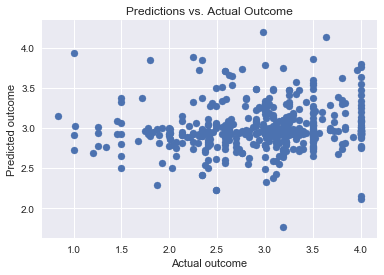

In [130]:
y_predicted = rcv.predict(X_test)

plt.scatter(y_test, y_predicted)
plt.title('Predictions vs. Actual Outcome')
plt.xlabel('Actual outcome')
plt.ylabel('Predicted outcome')

In [131]:
coeff_df = pd.DataFrame(rcv.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
calories,0.000040
carbohydrates,-0.001024
protein,-0.000120
cholesterol,-0.000203
sodium,0.000054
cooking_time,0.000314
Egg,-0.113933
Pork,-0.215815
Parmesan,0.090649
Herb,0.123789
